In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats

# Statistical significance test

## Normally distributed Data

### Welch's t-test


$$ t = \frac{\mu_1 - \mu_2}{\sqrt{\frac{\sigma_1^2}{N_1} + \frac{\sigma_2^2}{N_2}}}
$$

$$ v \approx \frac{ \Big( \frac{\sigma_1^2}{N_1} + \frac{\sigma_2^2}{N_2}\Big )^2}  { {\frac{\sigma_1^4}{N_1^2 \nu_1} + \frac{\sigma_2^4}{N_2^2 \nu_2}} } \hspace{3em} \nu_i = N_{i} -1
$$

In [30]:
def tTests(mu1,mu2,sig1,sig2,N1,N2):
    import math
    var1 = mu1-mu2
    var2 = sig1**2/N1
    var3 = sig2**2/N2
    return var1/math.sqrt(var2+var3)

def vTests(mu1,mu2,sig1,sig2,N1,N2):
    import math
    var1 = (sig1**2/N1)+(sig2**2/N2)
    var2 = sig1**4/((N1**2)*(N1-1))
    var3 = sig2**4/((N2**2)*(N2-1))
    return var1**2/(var2+var3)


In [31]:
import math
tTests(.307,.299,math.sqrt(0.08),math.sqrt(0.05),165.0,150.0)

0.2796823595120407

In [32]:
vTests(.307,.299,math.sqrt(0.08),math.sqrt(0.05),165.0,150.0)

307.1987997516728

### Welch's t-test in python

In [41]:
import scipy.stats

array1 = np.random.random_integers(100, 250, 100)
array2 = np.random.random_integers(200, 350, 100)

print(scipy.stats.ttest_ind(array1,array2, axis=0, equal_var=True))

(array(-16.206683140547266), 3.7062525995653424e-38)


In [43]:
print(scipy.stats.ttest_1samp(array2, 275))

(array(0.28537327196679535), 0.77595437342207163)


# Non-normal data


### Shapiro-Wilk Tests

Shapiro tests the likelyhood of sample drawn from a normal distribution

In [7]:
filename = "baseball_stats.csv"

df = pd.read_csv(filename)
dfLH = df[(df['handedness'] == "L")]
dfRH = df[(df['handedness'] == "R")]

w,p = scipy.stats.shapiro(dfLH['avg'])
print(w,p)

0.8488637208938599 0.0


## Non-parametric tests

A statical test that does not assume our data is drawn from any particular underlying probability distribution.

### Mann-Whitney U test
Tests null hypothesis that two populations are the same.
i.e., it checks wether the drawn sample comes from the same polulation

If p > 0.05 means the difference between X & Y is insignificant.

In [ ]:
u, p = scipy.stats.mannwhitneyu(X,Y)

# Machine Learning

<a href="http://projecteuclid.org/download/pdf_1/euclid.ss/1009213726">
### Statistics vs Machine Learning
</a>

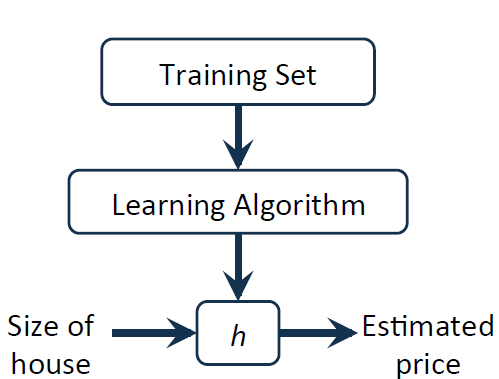

In [5]:
import IPython

IPython.display.Image("ML_Outline.png",retina=True)

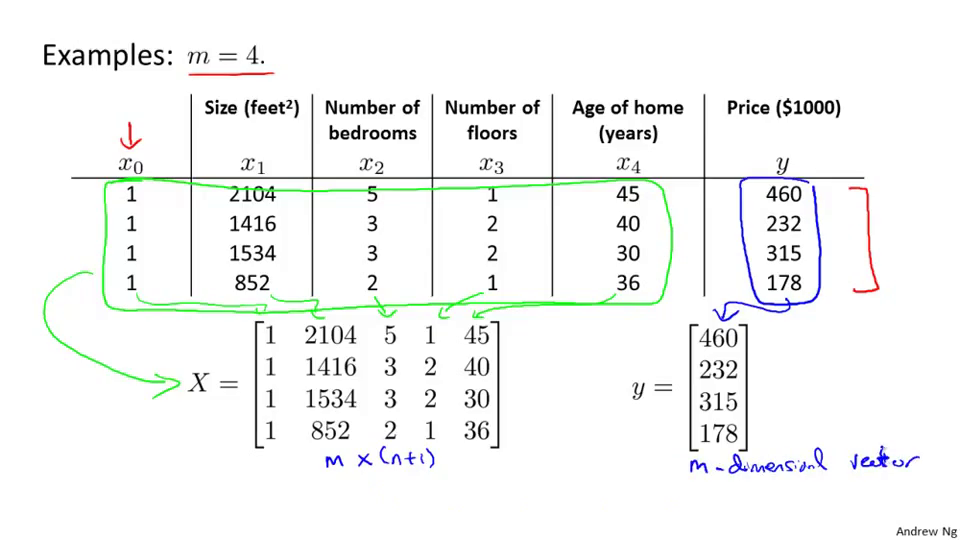

In [4]:
IPython.display.Image("nomenc.png",retina=True)

#### Terminilogy:
$\hspace{3em} m$ = number of samples i.e. len(training examples)

$\hspace{3em} n$ = number of features

$\hspace{3em} x^{(i)}$ = input variable (features) of the $i^{th}$ training example.

$\hspace{3em} x_j^{(i)}$ = value of variable (features) $j$ in the $i^{th}$ training example.

$\hspace{3em} y^{(i)}$ = output variables (training OR target) of the $i^{th}$ training example

$\hspace{3em} \theta$ = parameters/ weights

$\hspace{3em} \theta_j$ = parameter/ weight of $j$

(Refer video 4-1)

# We are just training the data to find the "HYPOTHESIS"

## Hypothesis representation (Linear)

#### Hypothesis:

$$ h_\theta =  \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3+ .... + \theta_n x_n =\sum_{x=0}^n \theta_n x_n  = \theta^T . x$$


#### Parameters (weights):
$$ \theta_0 , \theta_1, \theta_2, .... \theta_n \hspace{2em}$$


In [12]:
def hypothesis(features, weights):
    h_x = np.dot(features, weights)
    return h_x

#### Cost Function:
$$J(\theta_0,..\theta_m)= \frac{1}{2m} \sum_{x=1}^m [h_\theta(x^i)-y^i)]^2 $$

$$h_\theta(x^i) = \sum_{j=0}^N \theta_j x_j^i = \theta_0 x_0^i+\theta_1 x_1^i + ... + \theta_n x_n^i = y_{predicted}^i$$

In [13]:
def cost_function(features, target, weights):
    m = len(target)
    sum_of_square_errors = numpy.square(hypothesis(features, weights) - target).sum()
    cost = sum_of_square_errors / (2*m)
    return cost

#### Goal:   Minimize the cost function  

$$\hspace{2em} minimize ~ J(\theta_0,\theta_1, .... \theta_n)$$

## Method 1: Linear regression with "Gradient descent" (Numerical method)


$$\theta_j := \theta_j -\alpha \frac{\partial}{\partial \theta_j} J(\theta)$$

After substituting $J_{\theta}$ and similifying

$$ \theta_j := \theta_j + \frac{\alpha}{m} \sum^m_{i=1} \Big( y^i - h_\theta(x^i)\Big)x_j^i
$$

$\hspace{10em}(simulatenously~update~\theta_j ~for~all~j)$

STEPS:
    
   * Calculate the hypothesis $ h = X^T  \theta $ 
   * Calculate the loss $ J_{\theta} = y - h$ (Maybe cost squared $\frac{loss^2}{2m}$ !!)
   * Calculate the gradient = $X' * loss$
   * Update the parameters $\theta = \theta + \frac{\alpha}{m} * gradient$

Gradient Descent notes taken from <a href="https://class.coursera.org/ml-003/lecture"> coursera.com </a>



<a href="#Shapiro-Wilk Tests"> 
Welch's t-test </a> #moving up in the nootebook

In [6]:
#Find the cost function/hypothesis by iterating 'num_iterations' times on the training data

def gradient_descent(features, target, weights, alpha, num_iterations):
    m = len(target)
    cost_history = []
    
    for i in range(num_iterations):
        h_x = hypothesis(features, weights)
        loss = numpy.dot((h_xi - values), features)
        theta = theta - alpha*loss/m
        cost = compute_cost(features,values,theta)        
        cost_history.append(cost)
        

    return theta, pandas.Series(cost_history) # leave this line for the grader


## Method 2: Linear regression with "Normal equation" (Analytical method)

Refer 4-6


Minimize Cost function $(J_\theta)$ explicity by taking its derivatives wrt to $\theta_j$

$$\frac{\partial}{\partial \theta_j}(J_\theta) = 0$$

Normal equations

$$ X^TX\theta = X^T \vec{y}$$

The value of $\theta$ that minimizes $J(\theta)$ in <u>closed form</u> (antonym: iterative)

$$\theta = (X^TX)^{-1}X^T\vec{y} $$

In [23]:
def cost_func_normal(x_matrix,y_vector):
    from numpy.linalg import inv,pinv
    if len(y_vector) > len(x_matrix[0]):
        #normal inverse
        z = inv(dot(np.transpose(x_matrix),x_matrix))
        theta = dot(dot(z,np.transpose(x_matrix)),y_vector)
        return theta
    else:
        #psudo inverse
        z = pinv(dot(np.transpose(x_matrix), x_matrix))
        theta = dot(dot(z,np.transpose(x_matrix)), y_vector)
        return theta
    
    #Need to verfiy the code.

## Method 3: Linear regression with "Probabilistic interpretation"


Give a set of probabilistic assumption, under which least-square is derives as a very natural algorithm.

#### Assume that the target varbiables and the inmput are related by 
$$y^{(i)}=\theta^Tx^{(i)} + \epsilon^{(i)}$$


$\epsilon^{(i)}$ is the unmodeled effects or random noise, distributed IID (independently and identically distributed) according to Gaussian distribution. The 'mean' and 'variance' of $\epsilon^{(i)}$ are $0$ and  $\sigma^2$.


$$ p(\epsilon^{(i)}) = \frac{1}{\sqrt{2\pi\sigma}exp\Big( - \frac{(y^{(i)}) - \theta^T x^{(i)})^2}{2\sigma^2} \Big)}$$

## Method 4: "Locally weighted" Linear regression


# Multiple variables

## Hypothesis reprsentation (Polynomial)

#### Hypothesis

$$ h_\theta(x) =  \theta_0 x^0 + \theta_1 x_1^1+ \theta_2 x_2^2 + \theta_3 x_3^3+ .... + \theta_n x_n^n$$
$$ h_\theta(x) =  \theta_0 x^0 + \theta_1 x_1^1+ \theta_2 \sqrt{x_2} +  .... \theta f(x_n)$$

Many possible ways to represent $h_\theta(x)$ similar to polynomial equation